In [1]:
import fastf1.plotting
import f1analytics as f1

In [2]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(color_scheme='fastf1' )

session_year = 2025
session_name = "Dutch Grand Prix"
session_type = 'Q'


# load a session and its telemetry data
session = fastf1.get_session(session_year, session_name, session_type)
session.load()
# In this way i Can exclude the box laps
laps = session.laps

results = session.results

circuit_info = session.get_circuit_info()

weather = session.weather_data



req         WARNING 	DEFAULT CACHE ENABLED! (2.62 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '1', '6', '63', '16', '44', '30', '55', '14', '12', '22', '5', '10', '23', '43', '27', '31', '87', '18']


In [3]:
t = f1.telemetry.Telemetry(
    session=session,
    session_name=session_name,
    year=session_year,
    session_type=session_type
)

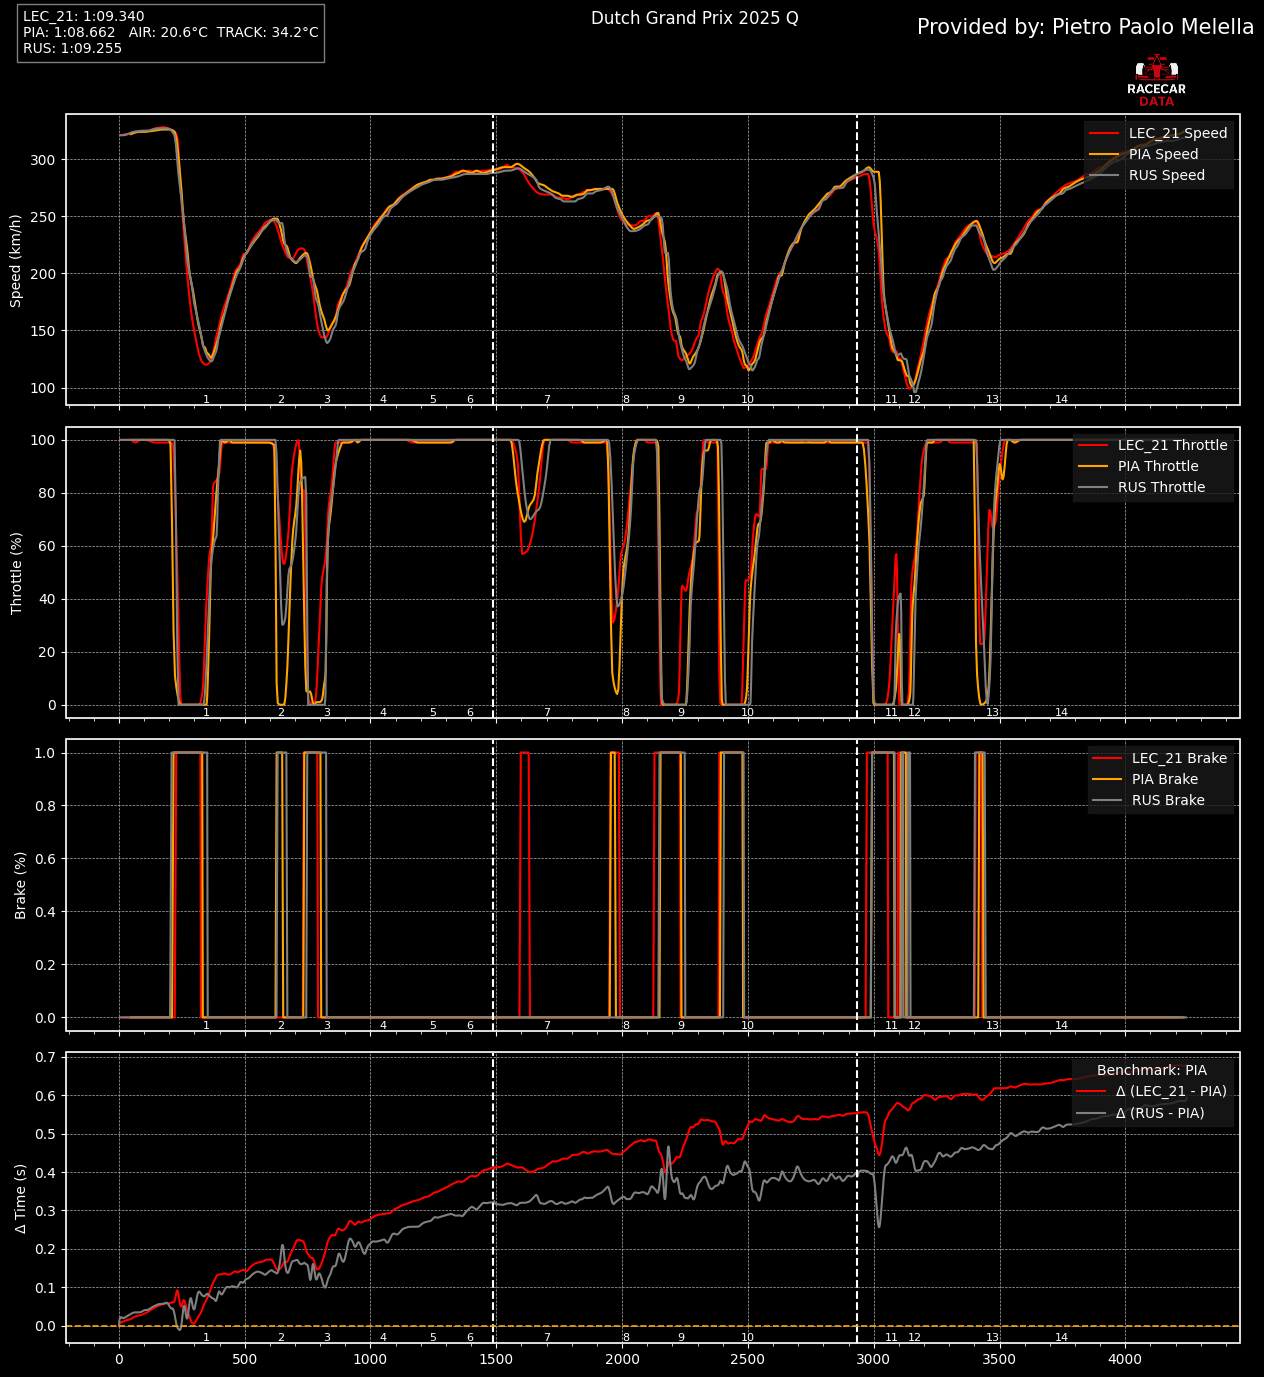

In [4]:
t.compare_laps(
    drivers={'LEC': '21', 'PIA': 'fastest', 'RUS': 'fastest'},
    channels=['Speed', 'Throttle', 'Brake','Delta'],
    session_label=session_type
)

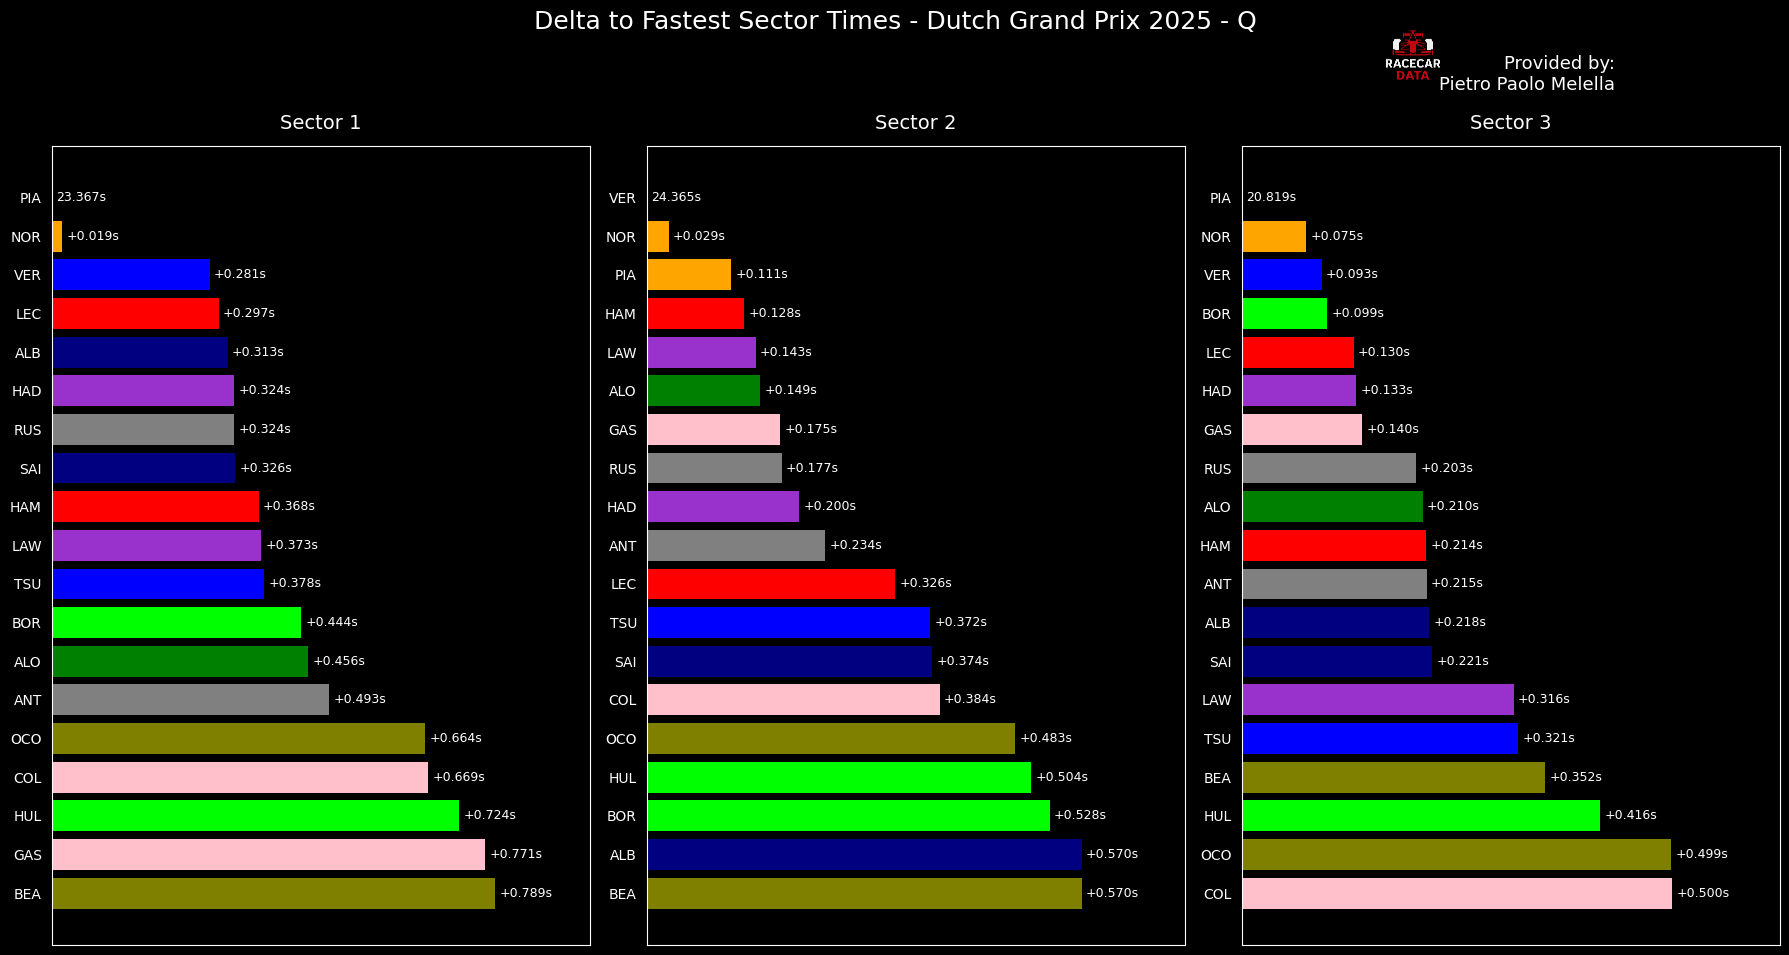

In [5]:
sd = f1.fastest_sectors_deltas.SectorDeltaPlotter(
    session, session_name, session_year, session_type
)
sd.plot()

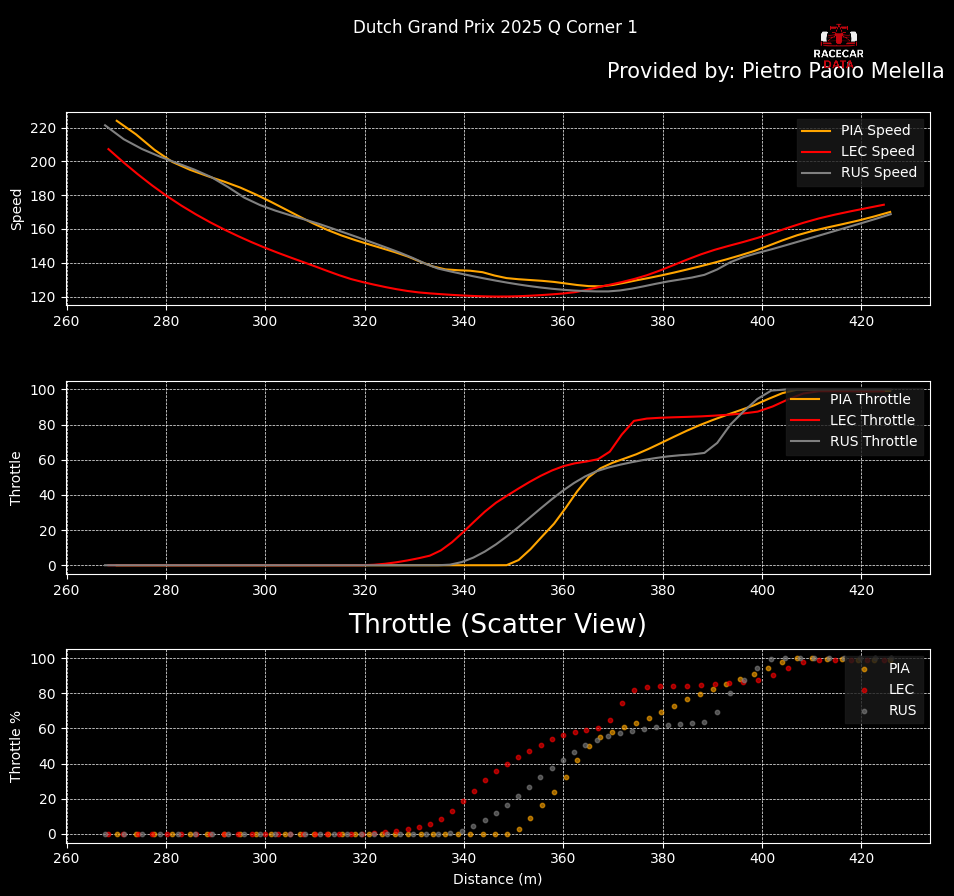

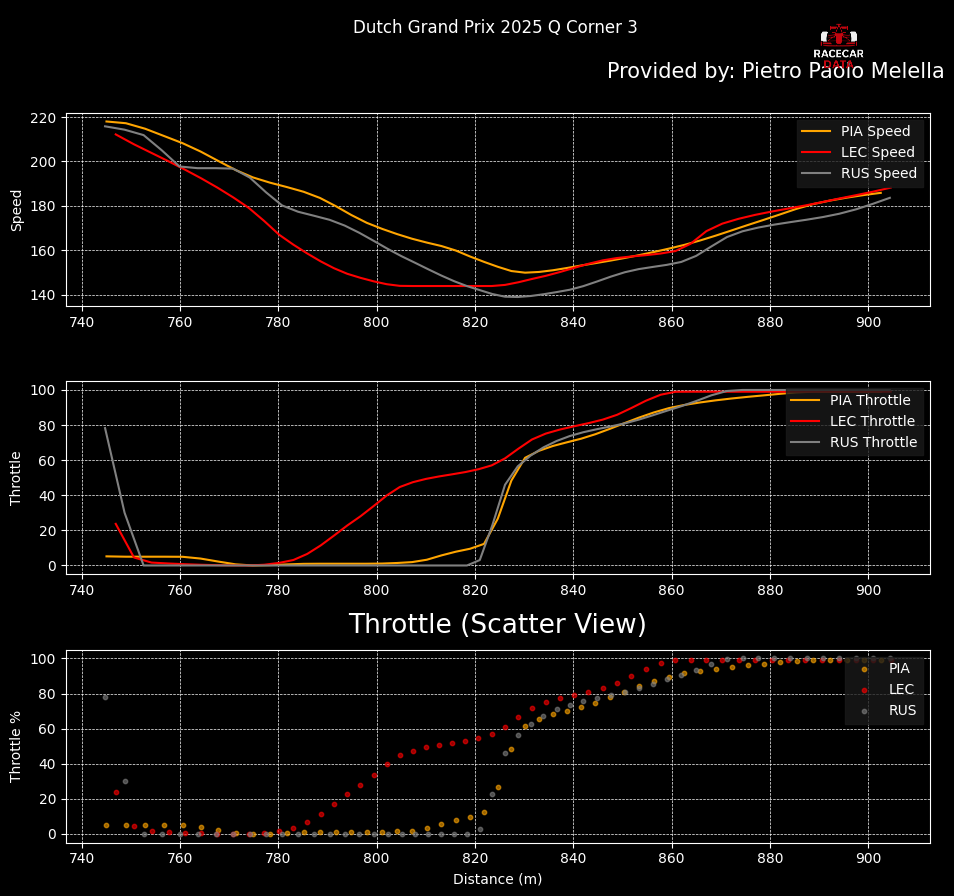

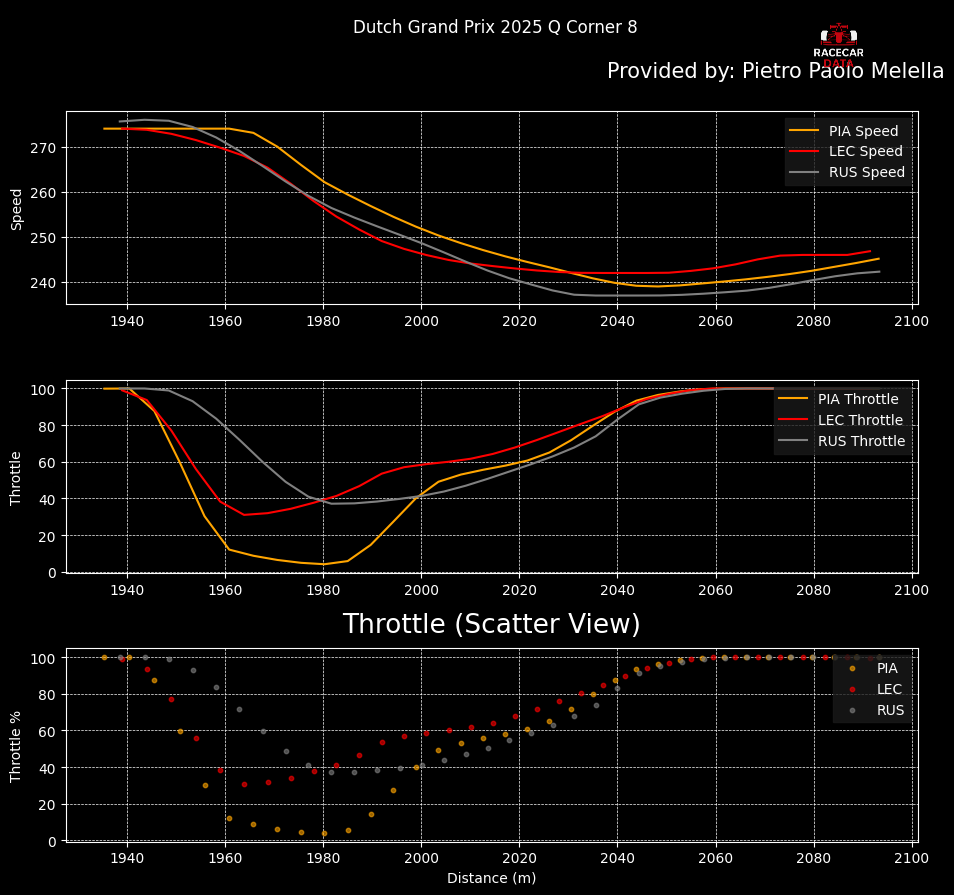

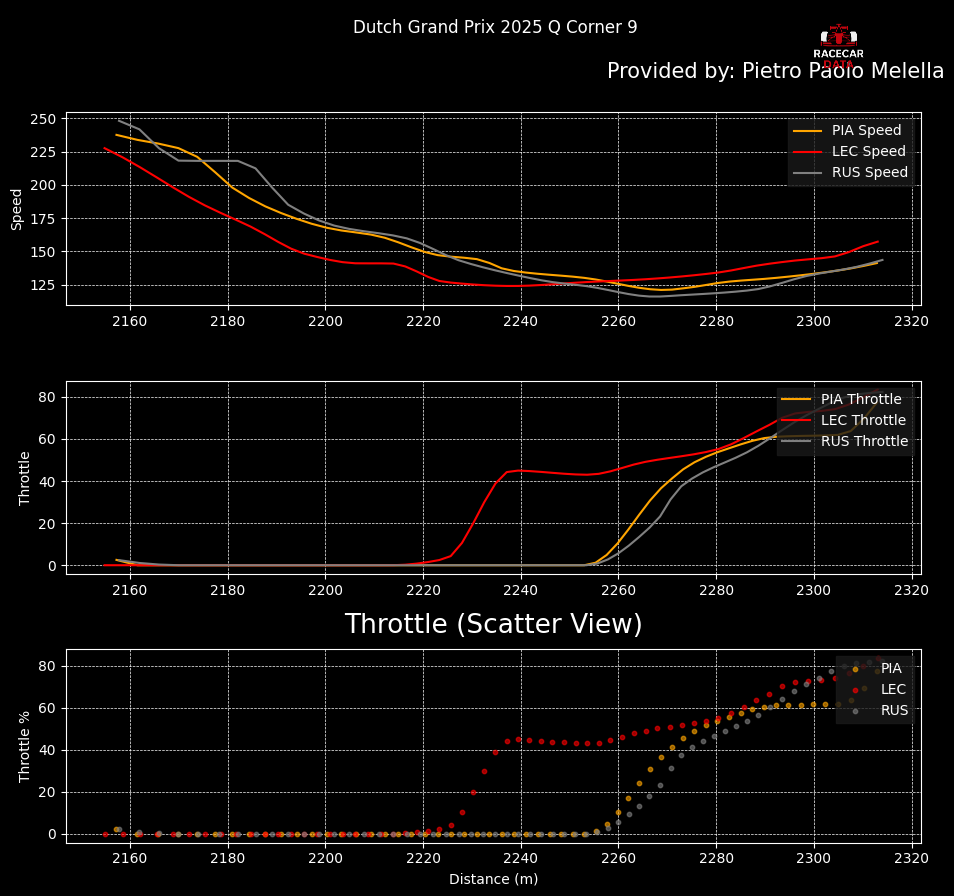

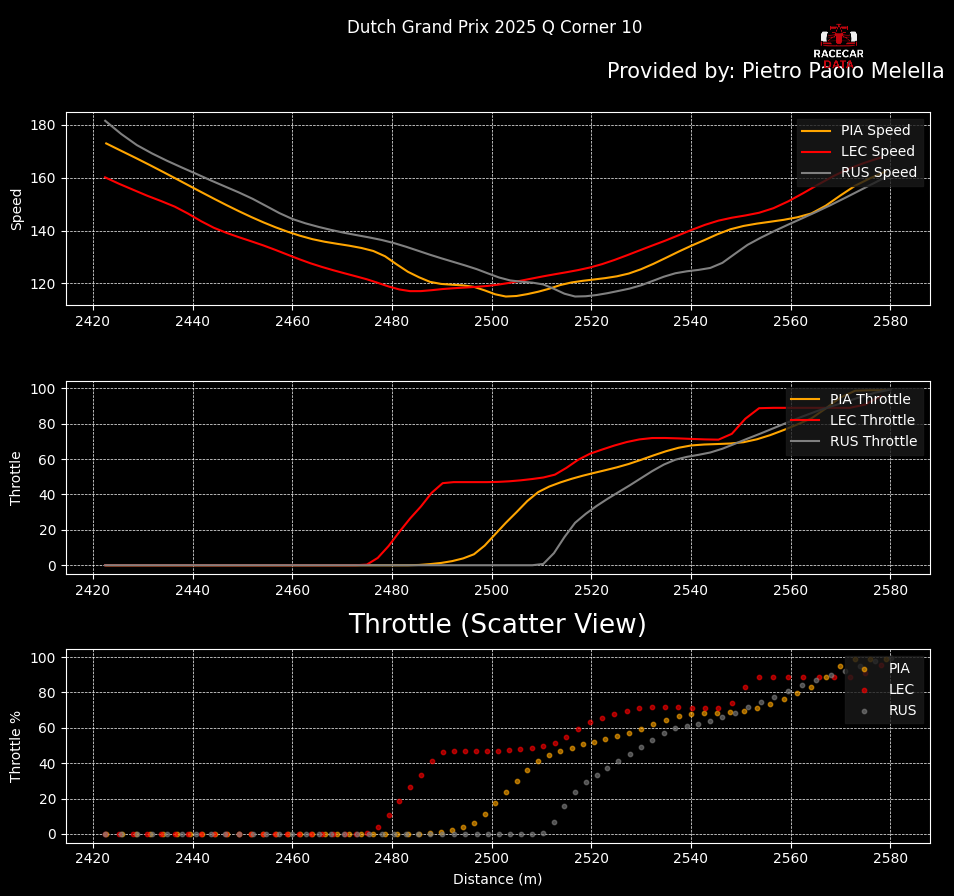

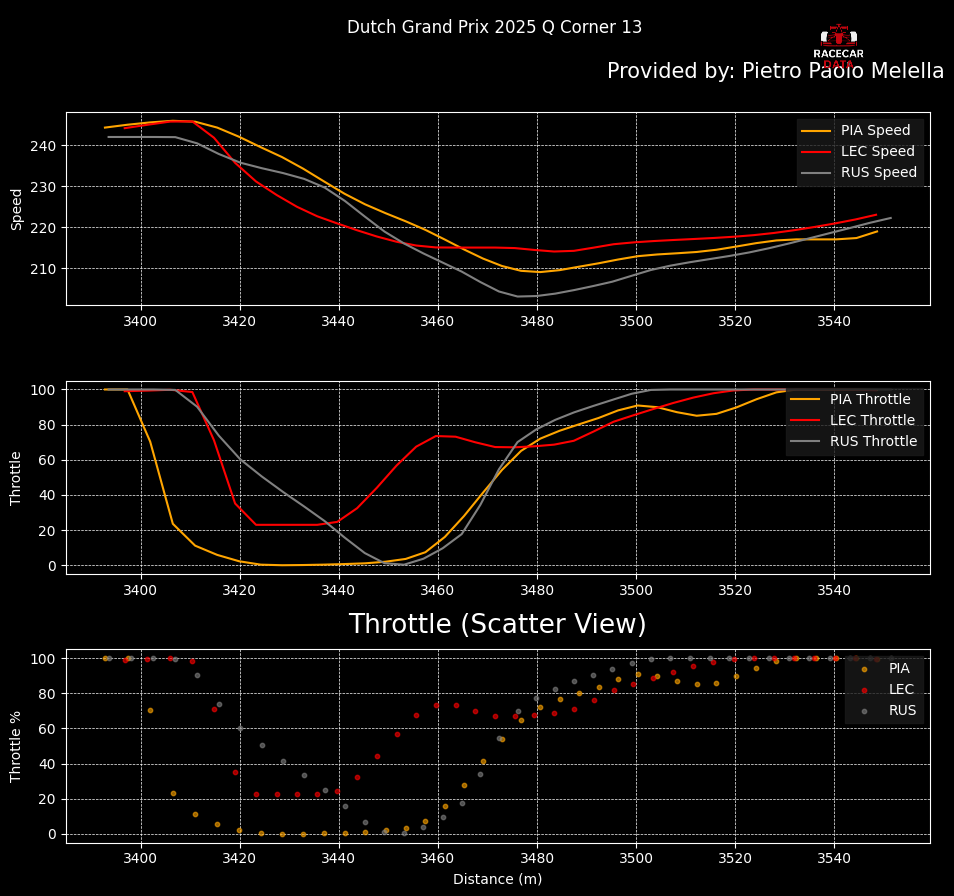

In [6]:
corners = [1, 3,8,9,10,13]
for corner in corners:
    ca = f1.corner_analysis.CornerAnalysis(
        session, session_name, session_year, session_type,
        drivers={'PIA': 'fastest', 'LEC': '21', 'RUS': 'fastest'},
        corner_idxs=[corner], before=80, after=80
    )
    ca.plot_all(['Speed', 'Throttle' ])

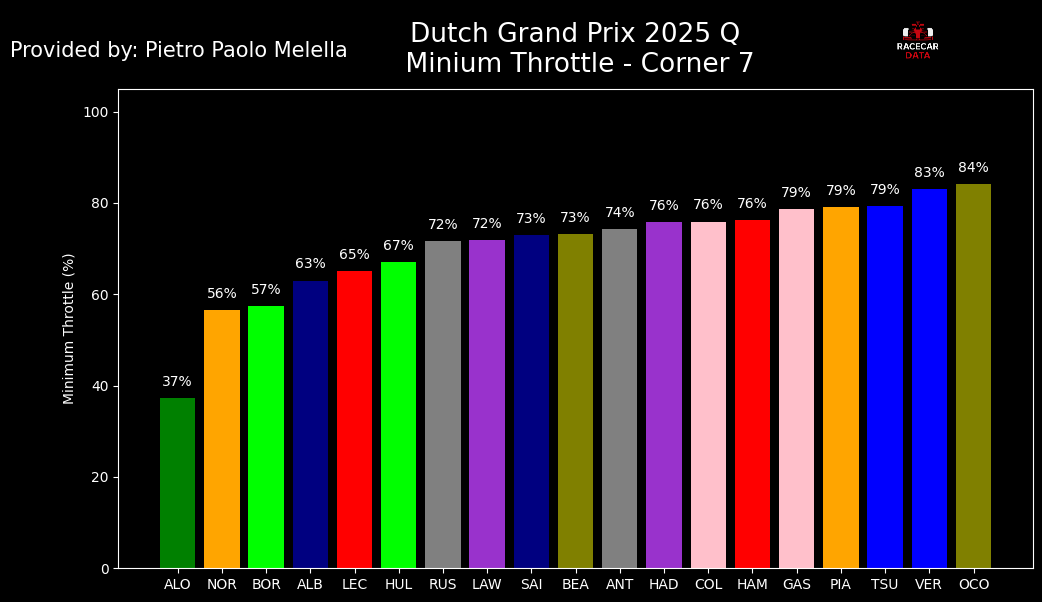

In [7]:
mtc = f1.min_throttle_corner.CornerMinThrottle(
    session, session_name, session_year, session_type,
    corner_idxs=[7], after=50, before=50, n_drivers=20
).plot()

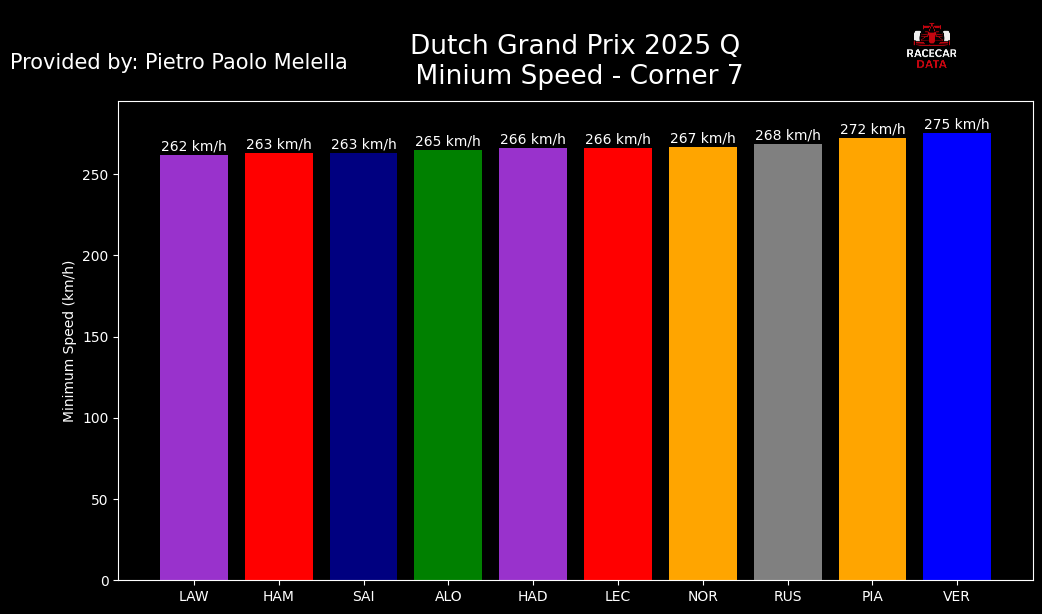

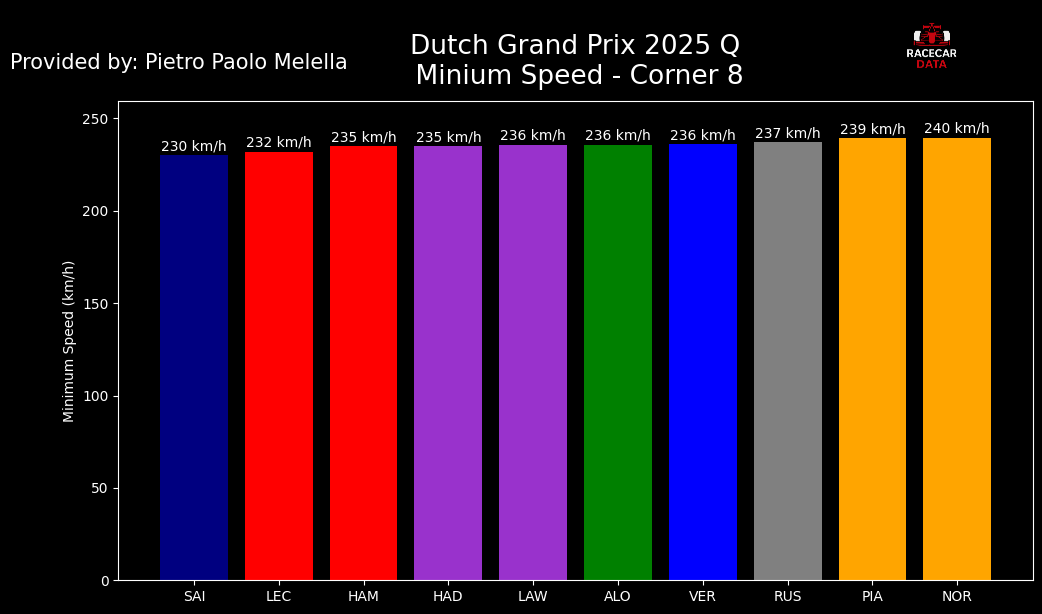

In [8]:
msc1 = f1.min_speed_corner.CornerMinSpeed(
    session, session_name, session_year, session_type,
    corner_idxs=[7], after=30, before=30, n_drivers=10
).plot()

msc2 = f1.min_speed_corner.CornerMinSpeed(
    session, session_name, session_year, session_type,
    corner_idxs=[8], after=30, before=30, n_drivers=10
).plot()

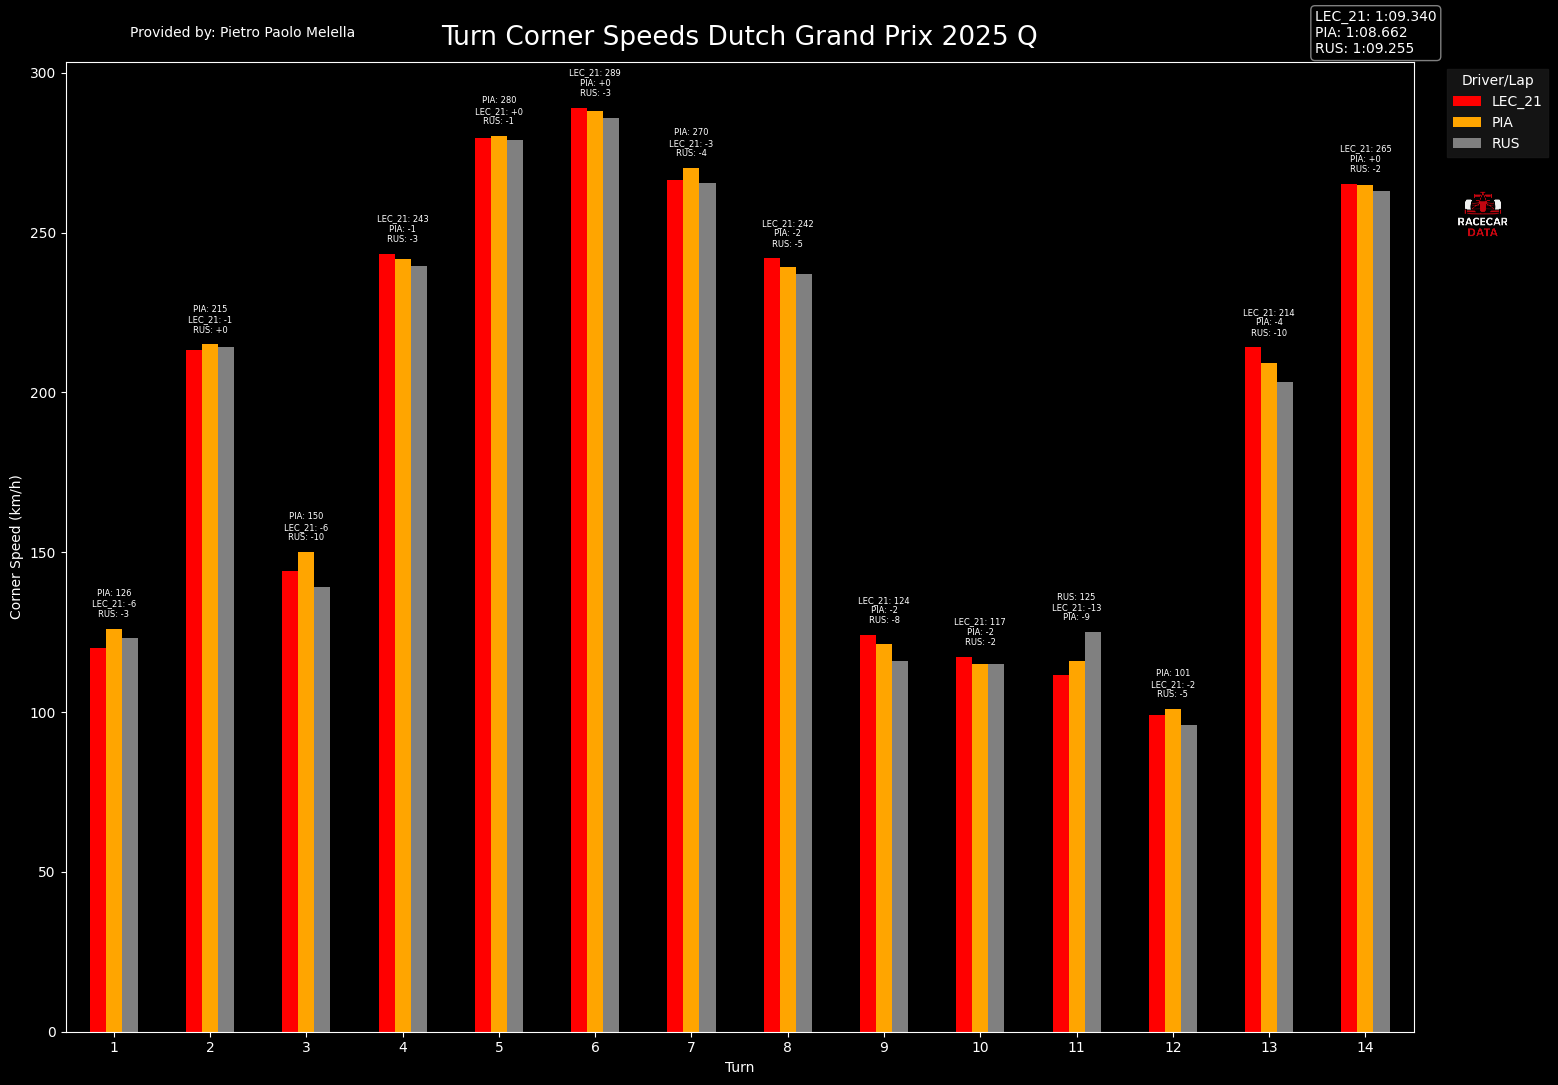

In [9]:
csc = f1.corner_speed.CornerSpeedComparator(
    drivers={'LEC': '21', 'PIA': 'fastest','RUS': 'fastest'},
    session=session,
    session_name=session_name,
    year=session_year,
    session_type=session_type
).plot_peak_speeds()

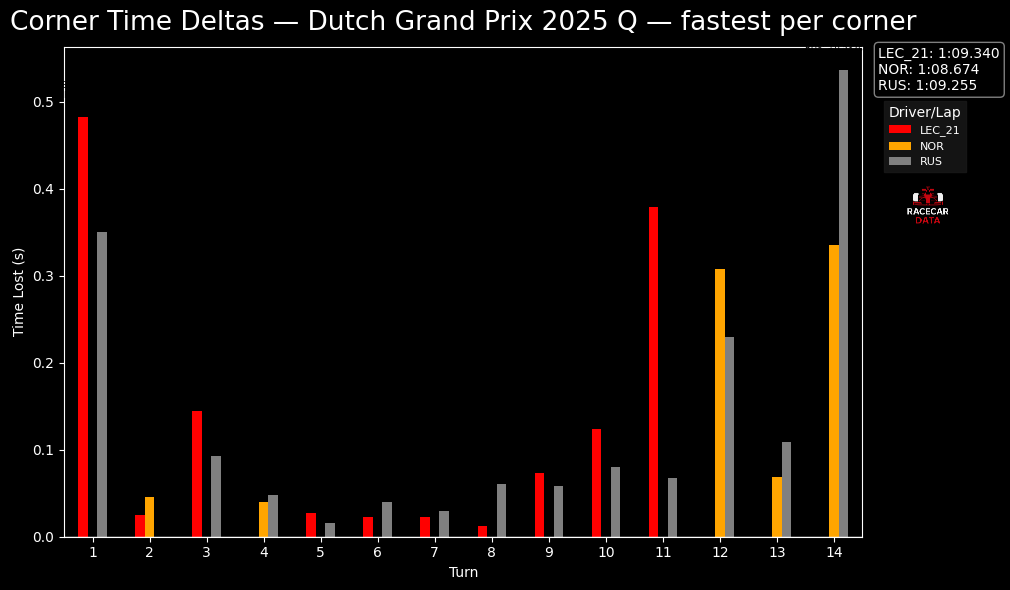

In [10]:
cmp = f1.corner_time_comparator.CornerTimeComparator(
    drivers=[('LEC',21), ('NOR','fastest'), ('RUS','fastest')],
    session=session,
    session_name=session_name,
    year=session_year,
    session_type=session_type
)

cmp.plot_corner_time_deltas(baseline='per_corner_fastest')

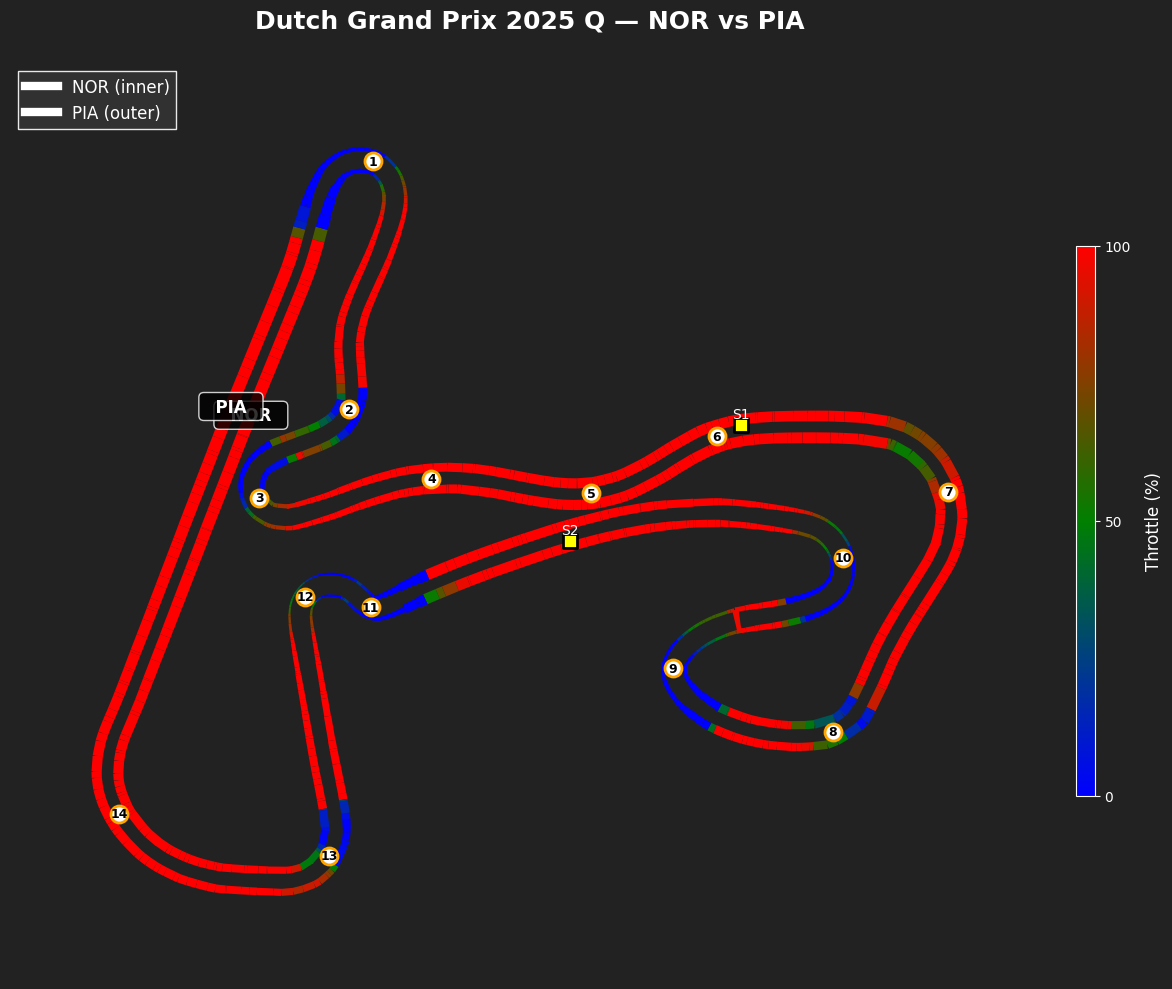

In [11]:
visualizer = f1.dual_throttle_compare.DualThrottleComparisonVisualizer(
    laps=laps,
    circuit_info=session.get_circuit_info(),
    reference_driver='NOR',      # Red line
    comparison_driver='PIA',     # Blue line
    offset_distance=125.0,       # Distance between parallel lines
    event_name=session_name,
    year=session_year,
    session_name=session_type,
    annotate_sectors=True,
)

visualizer.plot()